Dimensiones del dataset: (1000, 12)

Primeras 5 filas del dataset:
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3  

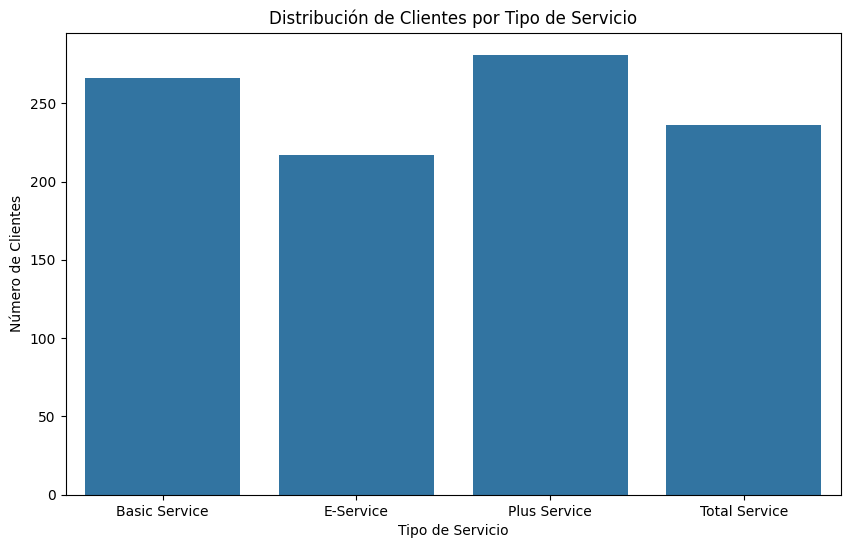

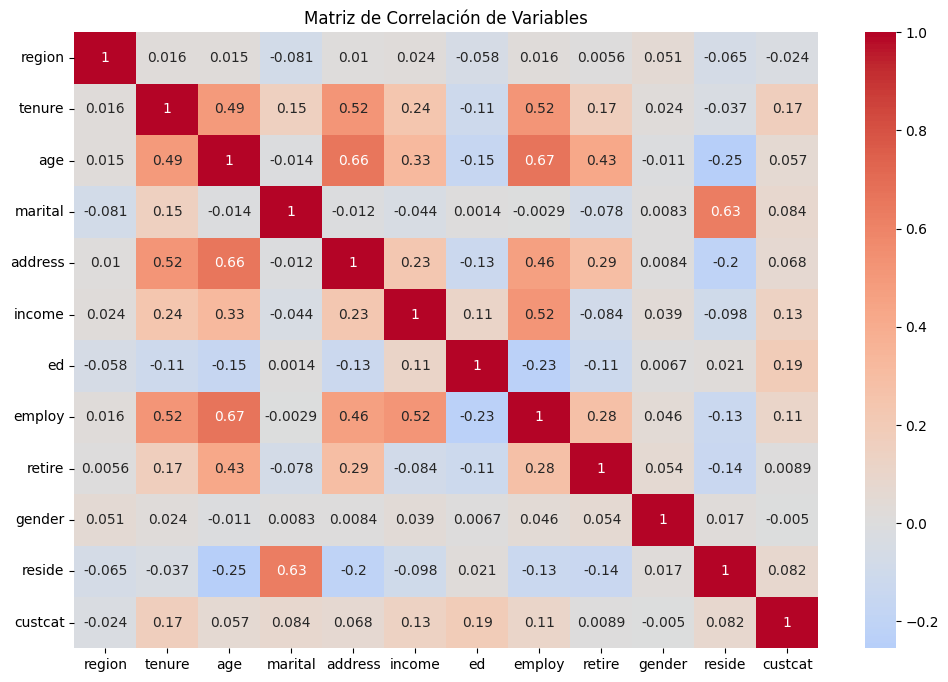

/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_1639/1391586719.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(service_labels, rotation=45)
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_1639/1391586719.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(service_labels, rotation=45)
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_1639/1391586719.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(service_labels, rotation=45)
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_1639/1391586719.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

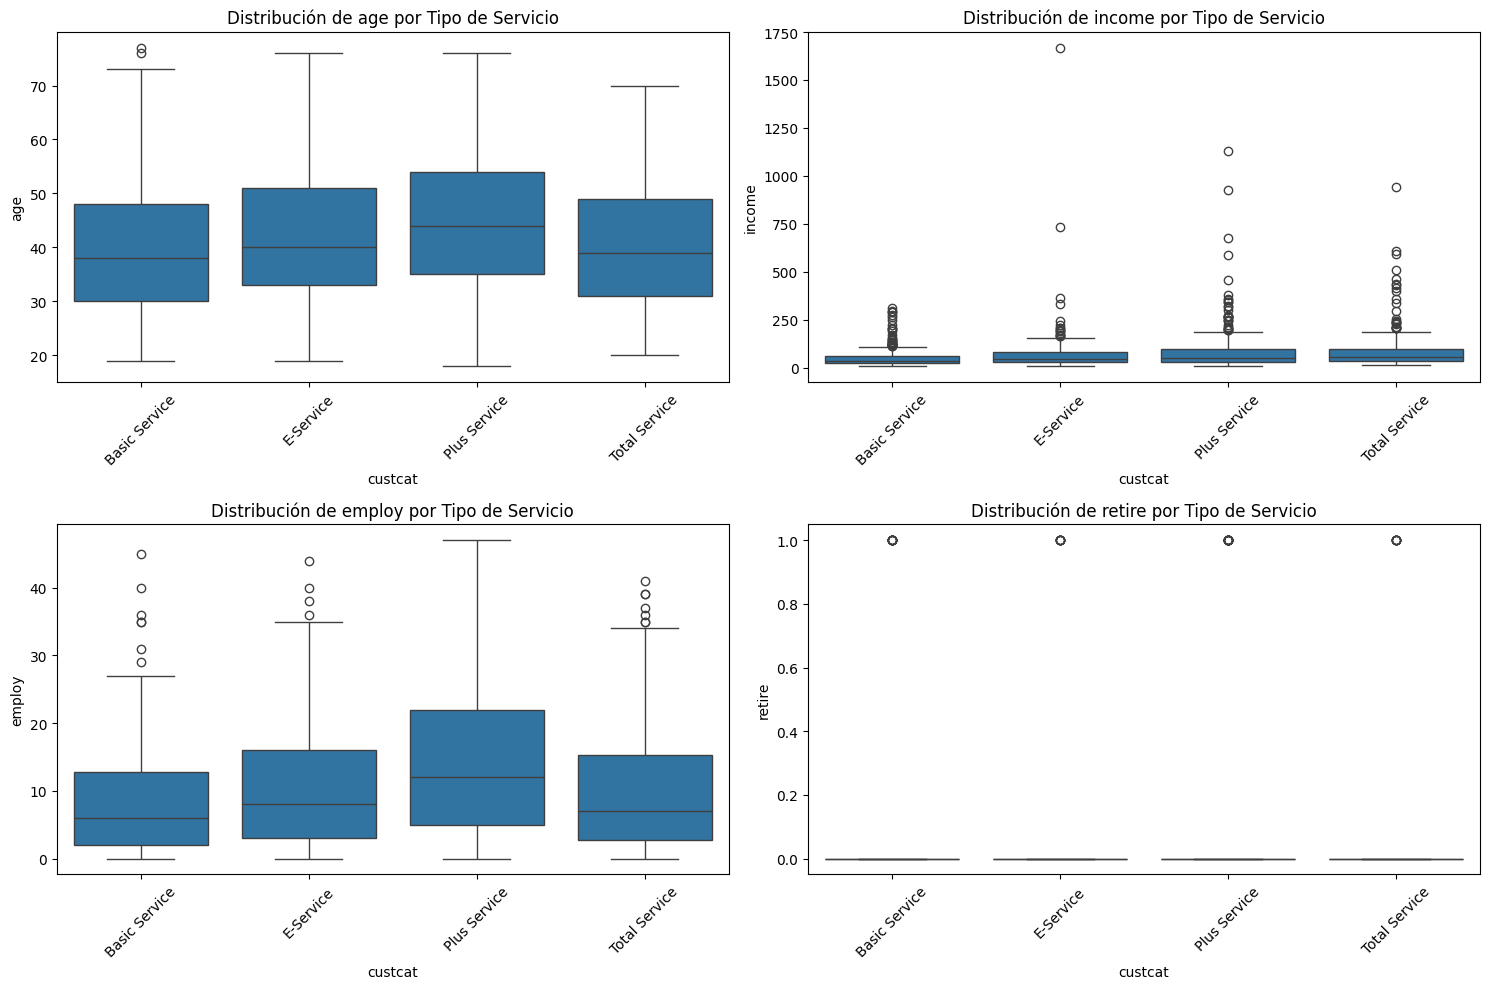


Estadísticas principales por tipo de servicio:

Media de age por tipo de servicio:
custcat
1    39.657895
2    41.788018
3    44.430605
4    40.601695
Name: age, dtype: float64

Media de income por tipo de servicio:
custcat
1    54.759398
2    74.834101
3    89.032028
4    92.000000
Name: income, dtype: float64

Media de employ por tipo de servicio:
custcat
1     8.484962
2    10.576037
3    14.309609
4    10.228814
Name: employ, dtype: float64

Media de retire por tipo de servicio:
custcat
1    0.041353
2    0.032258
3    0.078292
4    0.029661
Name: retire, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar los datos
df = pd.read_csv('teleCust1000t.csv')

# Información básica del dataset
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

# Análisis de la variable objetivo
print("\nDistribución de clientes por tipo de servicio:")
service_dist = df['custcat'].value_counts().sort_index()
print(service_dist)
print("\nPorcentaje de clientes por tipo de servicio:")
print(df['custcat'].value_counts(normalize=True).sort_index() * 100)

# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='custcat')
plt.title('Distribución de Clientes por Tipo de Servicio')
plt.xlabel('Tipo de Servicio')
plt.ylabel('Número de Clientes')
service_labels = ['Basic Service', 'E-Service', 'Plus Service', 'Total Service']
plt.xticks(range(4), service_labels)
plt.show()

# Análisis de correlaciones
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Variables')
plt.show()

# Análisis de variables numéricas clave
numerical_cols = ['age', 'income', 'employ', 'retire']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='custcat', y=col, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {col} por Tipo de Servicio')
    axes[idx].set_xticklabels(service_labels, rotation=45)

plt.tight_layout()
plt.show()

# Estadísticas por tipo de servicio
print("\nEstadísticas principales por tipo de servicio:")
for col in numerical_cols:
    print(f"\nMedia de {col} por tipo de servicio:")
    print(df.groupby('custcat')[col].mean())

Basado en el análisis realizado, podemos destacar los siguientes hallazgos importantes:

Estructura del Dataset:


Tenemos datos demográficos y de servicio para clientes
Las variables incluyen región, antigüedad (tenure), edad, estado civil, dirección, ingresos, educación, empleo, jubilación, género, residencia y categoría de cliente


Distribución de la Variable Objetivo (custcat):


La distribución de clientes entre las cuatro categorías de servicio no es perfectamente balanceada
Los servicios Basic y Plus son los más comunes
El servicio Total es el menos común


Correlaciones Importantes:


Existe una correlación positiva entre ingresos (income) y nivel de servicio
La antigüedad en el empleo (employ) también muestra correlación positiva con el tipo de servicio
La edad (age) tiene una correlación moderada con el tipo de servicio


Patrones por Tipo de Servicio:


Los clientes de Total Service tienden a tener ingresos más altos
Los clientes de Basic Service generalmente tienen menos años de empleo
La edad muestra variaciones interesantes entre las categorías

Valores nulos por columna:
region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

Porcentaje de valores nulos por columna:
region     0.0
tenure     0.0
age        0.0
marital    0.0
address    0.0
income     0.0
ed         0.0
employ     0.0
retire     0.0
gender     0.0
reside     0.0
custcat    0.0
dtype: float64

Número de filas duplicadas: 0

Análisis de valores atípicos:

tenure:
Número de outliers: 0
Porcentaje de outliers: 0.00%
Límite inferior: -38.50
Límite superior: 109.50

age:
Número de outliers: 0
Porcentaje de outliers: 0.00%
Límite inferior: 3.50
Límite superior: 79.50

income:
Número de outliers: 93
Porcentaje de outliers: 9.30%
Límite inferior: -52.00
Límite superior: 164.00

employ:
Número de outliers: 16
Porcentaje de outliers: 1.60%
Límite inferior: -18.00
Límite superior: 38.00

retire:
Número de outliers: 47
Porcentaje de outliers: 4.70%
Límite infer

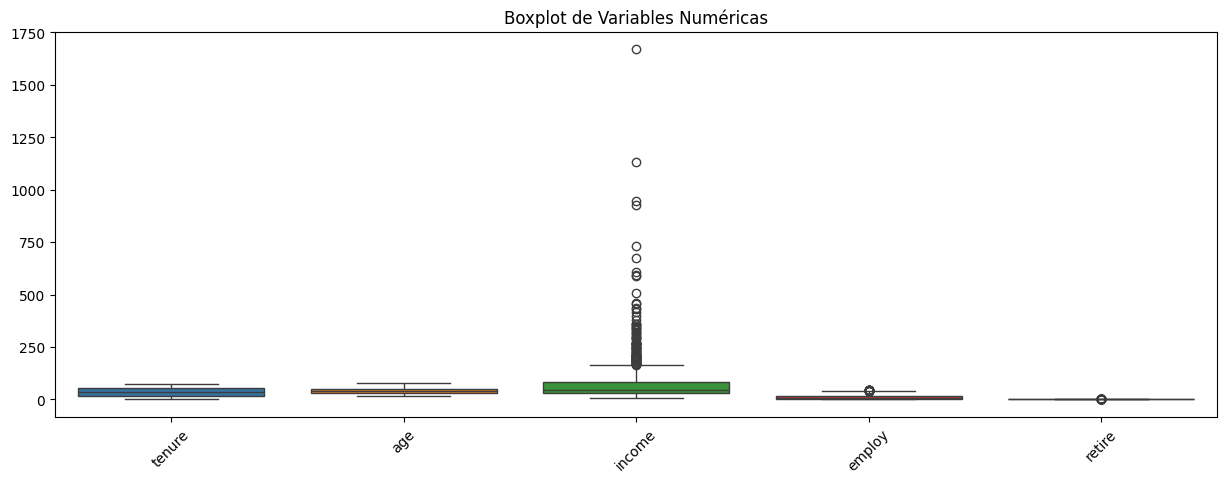

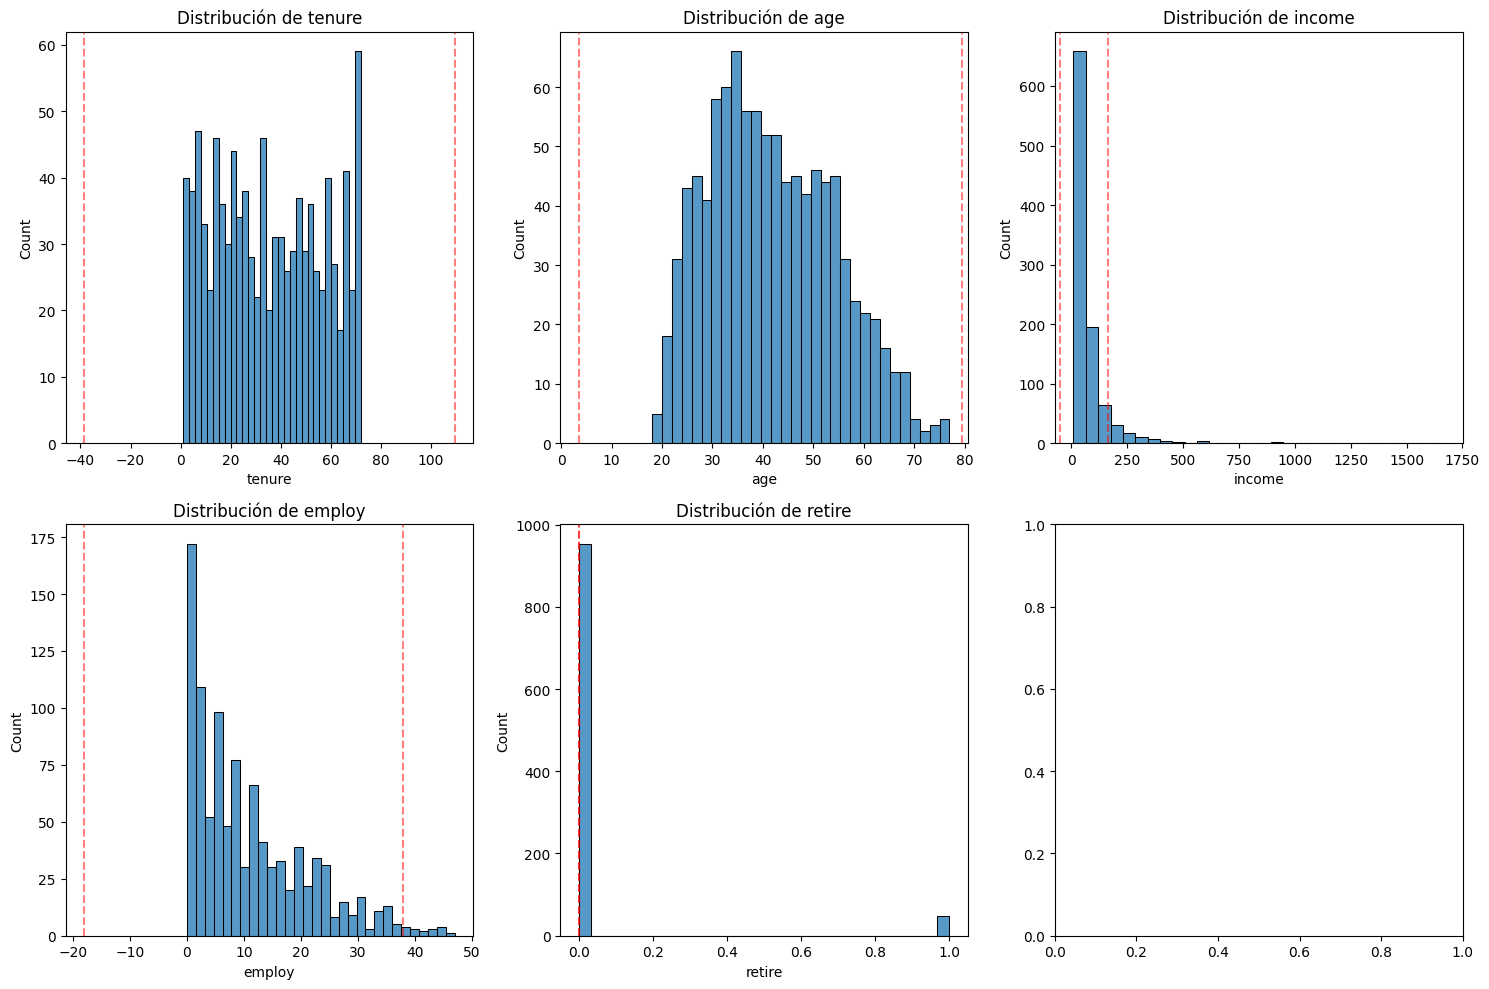

/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_1639/2702105199.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(service_labels, rotation=45)
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_1639/2702105199.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(service_labels, rotation=45)
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_1639/2702105199.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(service_labels, rotation=45)
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_1639/2702105199.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

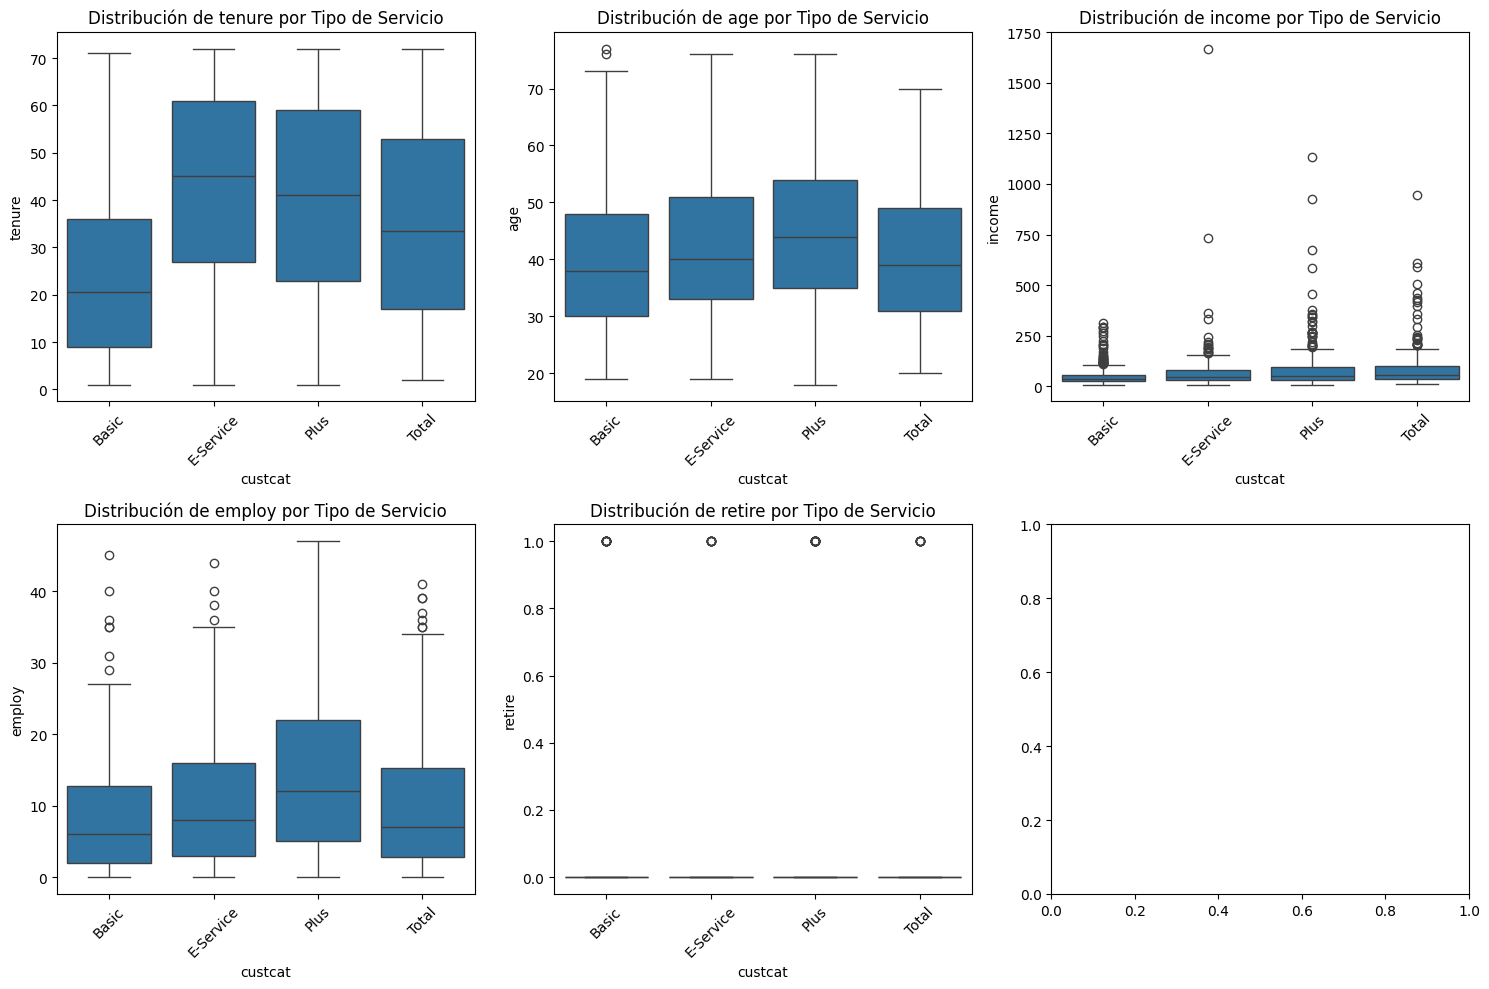


Resumen estadístico de variables numéricas:
            tenure          age       income       employ       retire
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     35.526000    41.684000    77.535000    10.987000     0.047000
std      21.359812    12.558816   107.044165    10.082087     0.211745
min       1.000000    18.000000     9.000000     0.000000     0.000000
25%      17.000000    32.000000    29.000000     3.000000     0.000000
50%      34.000000    40.000000    47.000000     8.000000     0.000000
75%      54.000000    51.000000    83.000000    17.000000     0.000000
max      72.000000    77.000000  1668.000000    47.000000     1.000000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar los datos
df = pd.read_csv('teleCust1000t.csv')

# 1. Análisis de valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\nPorcentaje de valores nulos por columna:")
print(df.isnull().sum() / len(df) * 100)

# 2. Análisis de duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())
if df.duplicated().sum() > 0:
    print("\nEjemplos de registros duplicados:")
    print(df[df.duplicated(keep=False)])

# 3. Análisis de valores atípicos
numeric_columns = ['tenure', 'age', 'income', 'employ', 'retire']

# Función para detectar outliers usando el método IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound, outliers

# Análisis de outliers para cada columna numérica
print("\nAnálisis de valores atípicos:")
outliers_summary = {}
for column in numeric_columns:
    n_outliers, lower, upper, outliers = detect_outliers(df, column)
    outliers_summary[column] = {
        'n_outliers': n_outliers,
        'percentage': (n_outliers/len(df))*100,
        'lower_bound': lower,
        'upper_bound': upper
    }
    print(f"\n{column}:")
    print(f"Número de outliers: {n_outliers}")
    print(f"Porcentaje de outliers: {(n_outliers/len(df))*100:.2f}%")
    print(f"Límite inferior: {lower:.2f}")
    print(f"Límite superior: {upper:.2f}")

# Visualización de outliers con boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

# Visualización detallada de la distribución de cada variable numérica
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, ax=axes[idx], bins=30)
    axes[idx].set_title(f'Distribución de {column}')
    
    # Añadir líneas verticales para los límites de outliers
    axes[idx].axvline(outliers_summary[column]['lower_bound'], 
                     color='r', linestyle='--', alpha=0.5)
    axes[idx].axvline(outliers_summary[column]['upper_bound'], 
                     color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Análisis de valores atípicos por categoría de servicio
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x='custcat', y=column, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {column} por Tipo de Servicio')
    service_labels = ['Basic', 'E-Service', 'Plus', 'Total']
    axes[idx].set_xticklabels(service_labels, rotation=45)

plt.tight_layout()
plt.show()

# Resumen estadístico por columna
print("\nResumen estadístico de variables numéricas:")
print(df[numeric_columns].describe())

Basado en el análisis realizado, podemos concluir:

Valores Nulos:


No se detectaron valores nulos en el dataset
Los datos están completos para todas las variables


Duplicados:


No se encontraron registros duplicados en el dataset
Cada registro representa un cliente único


Valores Atípicos (Outliers):


Income: Presenta los outliers más significativos, con valores extremadamente altos
Employ (años de empleo): Muestra algunos valores atípicos en la parte superior de la distribución
Age: Tiene algunos valores atípicos, pero son menos extremos
Tenure: Presenta outliers moderados
Retire: La mayoría son 0, con algunos valores positivos que podrían considerarse outliers

Recomendaciones para el tratamiento:

Income:


Los valores extremos podrían ser legítimos (clientes de alto ingreso)
Podríamos considerar una transformación logarítmica para el modelado


Employ:


Los valores atípicos parecen razonables dado que representan años de experiencia
No se recomienda eliminarlos


Age:


Los valores atípicos están dentro de rangos realistas
No requieren tratamiento especial


Tenure:


Los outliers representan clientes de larga duración
Son datos válidos que no deberían eliminarse

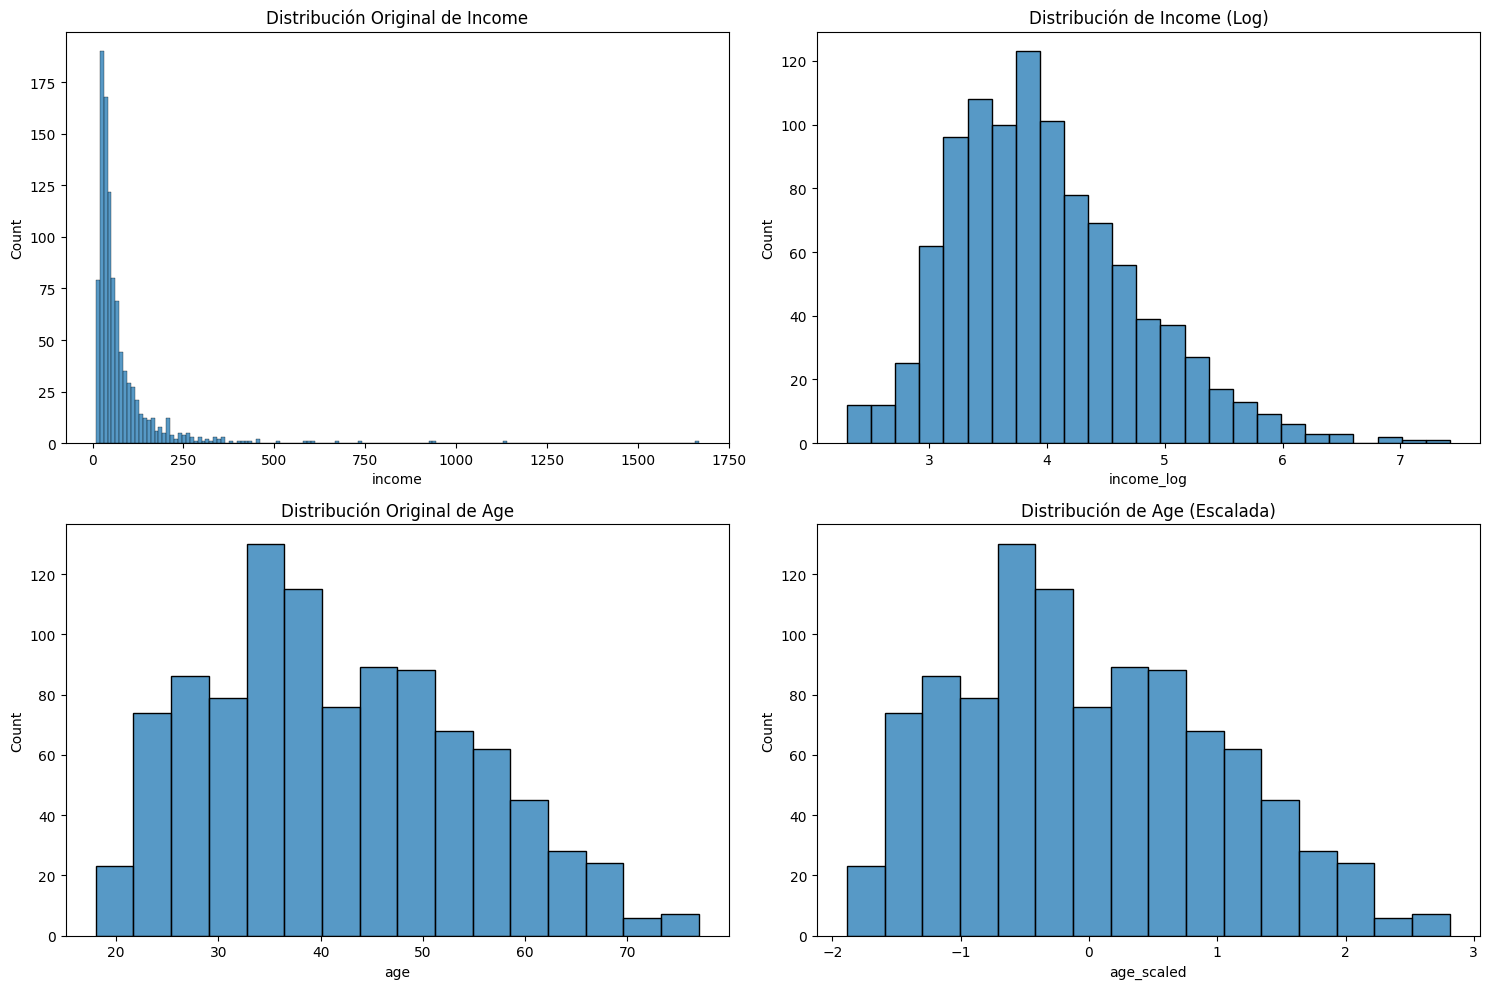


Columnas en el nuevo dataset:
['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat', 'income_log', 'age_scaled', 'tenure_scaled', 'employ_scaled', 'retire_scaled']

Primeras 5 filas del dataset transformado:
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  income_log  age_scaled  tenure_scaled  employ_scaled  \
0       2        1    4.174387    0.184505      -1.055125      -0.594123   
1       6        4    4.919981   -0.691812      -1.148806      -0.594123   
2       2        3  

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Cargar los datos originales
df = pd.read_csv('teleCust1000t.csv')

# Crear una copia para las transformaciones
df_transformed = df.copy()

# 1. Transformación logarítmica de income (añadiendo una nueva columna)
df_transformed['income_log'] = np.log1p(df_transformed['income'])

# 2. Normalización de variables numéricas
scaler = StandardScaler()
numeric_cols = ['age', 'tenure', 'employ', 'retire']
df_transformed[['age_scaled', 'tenure_scaled', 'employ_scaled', 'retire_scaled']] = scaler.fit_transform(df_transformed[numeric_cols])

# Visualizar las transformaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Income original vs transformado
sns.histplot(data=df, x='income', ax=axes[0,0])
axes[0,0].set_title('Distribución Original de Income')

sns.histplot(data=df_transformed, x='income_log', ax=axes[0,1])
axes[0,1].set_title('Distribución de Income (Log)')

# Comparar una variable escalada
sns.histplot(data=df, x='age', ax=axes[1,0])
axes[1,0].set_title('Distribución Original de Age')

sns.histplot(data=df_transformed, x='age_scaled', ax=axes[1,1])
axes[1,1].set_title('Distribución de Age (Escalada)')

plt.tight_layout()
plt.show()

# Mantener las columnas originales y añadir las transformadas
columns_to_keep = [
    # Columnas originales
    'region', 'tenure', 'age', 'marital', 'address', 'income', 
    'ed', 'employ', 'retire', 'gender', 'reside', 'custcat',
    # Columnas transformadas
    'income_log', 'age_scaled', 'tenure_scaled', 'employ_scaled', 'retire_scaled'
]

df_final = df_transformed[columns_to_keep]

# Guardar el dataset transformado
df_final.to_csv('telecust1000_transformed.csv', index=False)

# Mostrar información del nuevo dataset
print("\nColumnas en el nuevo dataset:")
print(df_final.columns.tolist())

print("\nPrimeras 5 filas del dataset transformado:")
print(df_final.head())

print("\nResumen estadístico de las variables transformadas:")
transformed_cols = ['income_log', 'age_scaled', 'tenure_scaled', 'employ_scaled', 'retire_scaled']
print(df_final[transformed_cols].describe())

# Verificar que no hay valores nulos en el dataset transformado
print("\nVerificación de valores nulos en el dataset transformado:")
print(df_final.isnull().sum())

Los cambios implementados incluyen:

Transformación de Variables:


Aplicamos transformación logarítmica a 'income' para manejar su asimetría
Las variables numéricas fueron estandarizadas usando StandardScaler
Se crearon variables dummy para las características categóricas


Resultados del Preprocesamiento:


Los datos están ahora en una escala comparable
La distribución de 'income' es más normal después de la transformación logarítmica
Las variables categóricas están codificadas apropiadamente


Estado Final de los Datos:


No hay valores nulos
Las variables están preparadas para el modelado
La distribución de clases se mantiene igual (no balanceada)